<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch03_03_%EA%B8%B0%EB%8C%80%EA%B0%92%EA%B3%BC_%EB%B6%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 기대값과 분산
---
* 날짜:
* 이름:

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [ ]:
def E(X, P=[]):
  if not len(P): P=np.array([1/len(X)]*len(X))
  return np.sum( X*P )

In [ ]:
X = np.array([10,20,30,40])
P = np.array([1/10, 2/10, 3/10, 4/10])
E(X), E(X,P)

(25.0, 30.0)

#### **예제 01. 공정한 주사위**



In [ ]:
X = np.arange(1,7)
print(X)
E(X)

[1 2 3 4 5 6]


3.5

#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [ ]:
P = np.array([1/9,2/9,1/9,2/9,1/9,2/9])
print(X, P)
E(X,P)

[1 2 3 4 5 6] [0.11111111 0.22222222 0.11111111 0.22222222 0.11111111 0.22222222]


3.666666666666666

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [ ]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

print('E(X)',E(X))
print('E(Y)',E(Y))
print('E(c)',E(c))
print('E(X+Y)',E(X+Y))
print('E(X)+E(Y)',E(X)+E(Y))
print('E(4*X+3)',E(4*X+3))
print('4*E(X)+3', 4*E(X)+3)

E(X) 2.5
E(Y) 25.0
E(c) 4.0
E(X+Y) 27.5
E(X)+E(Y) 27.5
E(4*X+3) 13.0
4*E(X)+3 13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [ ]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

print('국어점수+수학점수의 평균:', E(X_국어+X_수학))
print('국어점수평균 + 수학점수평균:', E(X_국어)+E(X_수학))

국어점수+수학점수의 평균: 130.0
국어점수평균 + 수학점수평균: 130.0


### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [ ]:
def V(X,P=[]):
  if not len(P): P=np.array([1/len(X)]*len(X))
  return E( (X-E(X,P))**2) 

In [ ]:
X = np.array([10,20,30,40])
P = np.array([1/10, 2/10, 3/10, 4/10])
E(X), E(X,P), V(X), V(X,P)

(25.0, 30.0, 125.0, 150.0)

#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [ ]:
X = np.array([0,1,2])
P = np.array([1/4,2/4,1/4])
E(X), V(X)

(1.0, 0.6666666666666666)

#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

print('V(X):', V(X))
print('V(c):', V(c))
print('V(2X):', V(2*X))
print('V(2X-2):', V(2*X-2))
print('4 x V(X)', 4*V(X))

V(X): 6.666666666666666
V(c): 0.0
V(2X): 26.666666666666664
V(2X-2): 26.666666666666664
4 x V(X) 26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [ ]:
def Cov(X,Y, PX=[],PY=[]):
  if not len(PX): PX = np.array([1/len(X)]*len(X))
  if not len(PY): PY = np.array([1/len(Y)]*len(Y)) 
  return E( (X-E(X,PX)) * (Y-E(Y,PY)) )

In [ ]:
X = np.array([10,20,30,40])
Y = np.array([40,30,20,10])
Z = np.array([10,20,10,20])
Cov(X,Y), Cov(X,Z)

(-125.0, 25.0)

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [ ]:
def rho(X,Y, PX=[],PY=[]):
  if not len(PX): PX = np.array([1/len(X)]*len(X))
  if not len(PY): PY = np.array([1/len(Y)]*len(Y)) 
  return Cov(X,Y,PX,PY) / np.sqrt( V(X,PX)*V(Y,PY) )

In [ ]:
rho(X,Y), rho(X, Z)

(-1.0, 0.4472135954999579)

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y - [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [ ]:
X = np.arange(3)
Y = np.arange(3)
PX = np.array([1,2,2])/5
PY = np.array([1,3,1])/5

Cov(X, Y, PX, PY), rho(X,Y, PX, PY)

(0.6666666666666666, 0.9712858623572641)

#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


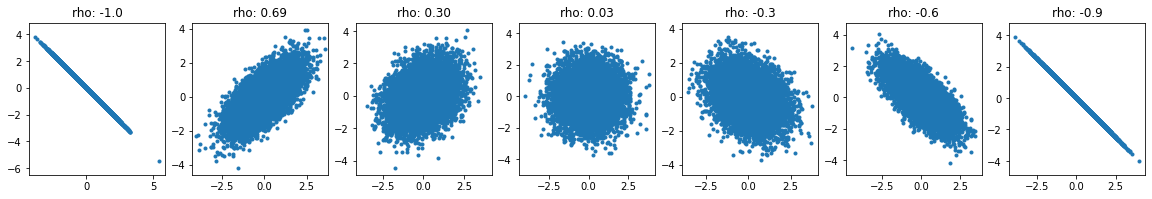

In [ ]:
plt.figure(figsize=(20,2.8))
for i, a in enumerate([-1,0.7,0.3,0.01,-0.3,-0.7,-1]):
  x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
  plt.subplot(1,7,i+1)
  plt.axis('equal')
  plt.title(f'rho: {rho(x,y)}'[:9])
  plt.scatter(x,y, marker='.')

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


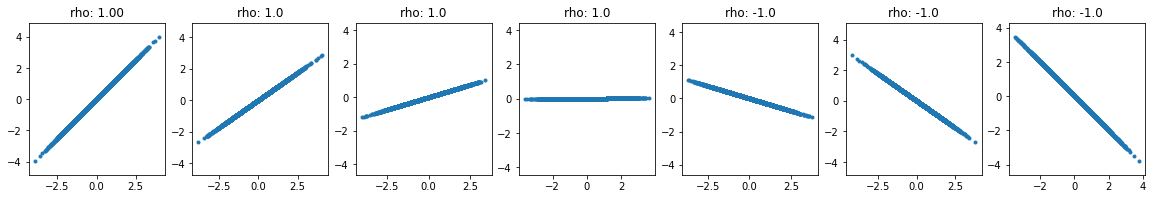

In [ ]:
plt.figure(figsize=(20,2.8))
for i, a in enumerate([1, 0.7, 0.3, 0.01, -0.3, -0.7, -1]):
  x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
  plt.subplot(1,7,i+1)
  plt.axis('equal')
  plt.title(f'rho: {rho(x,y*a)}'[:9])
  plt.scatter(x,y*a, marker='.')